# Hoja 2

### Glosario

In [ ]:
$ ls : Lista archivos y directorios.
$ pwd : Muestra el path actual.
$ mkdir : Crea nuevos directorios.
$ rm : Elimina archivos y directorios.
$ mv : Mueve o renombra archivos y directorios.
$ cp : Copia archivos y directorios.

$ stat : Muestra el estado de un archivo o sistema de archivos (en un enlace simbolico info del fichero original).
$ fstat : Muestra el estado de un sistema de ficheros.
$ lstat : Muestra el estado del propio enlace.
$ touch : Actualiza los tiempos de acceso y modificación de un fichero (si no existe lo crea).

$ chmod : Cambia los permisos de un archivo o directorio.
$ chown : Cambia el propietario y grupo de un archivo o directorio.
$ chgrp : Cambia el grupo asociado a un archivo o directorio.

$ ln : Crea enlaces físicos o simbólicos entre archivos y directorios.
$ readlink : Leer el contenido de un enlace simbolico.
$ file : Muestra el tipo de un archivo.
$ file $(ls) : utiliza lo devuelto por ls como argumentos para file.

$ stat -f . : Da información del superbloque relacionado a la busqueda.
$ df -T : Información de los sistemas de ficheros que estan montados en los diferentes puntos del VFS.
$ debugfs -R "<comando> <<inodo>>" <sistema de ficheros> : Debuggea el sistema de ficheros.
$ gcc -o <nombreCompilado> <Archivo a compilar> : compila un script de c.
$ <nombreCompilado> : ejecuta el archivo compilado.

$ readelf <nombreCompilado> -l : Muestra la información de los segmentos del programa ejecutable.
$ cat /proc/$$/maps : Muestra el mapeo de memoria del proceso actual (la shell en este caso).
/proc/$$/fd/1 : 
    proc : Sistema de ficheros virtual que contiene información sobre los procesos y el sistema.
    $$ : Variable que representa el PID del proceso actual (la shell en este caso).
    fd : Directorio que contiene descriptores de archivos abiertos por el proceso.
    1 : Descriptor de archivo estándar para la salida estándar (stdout).

#### Funciones de manejo de ficheros en C (equivalentes a comandos de Linux)

In [ ]:
int link (const chat *old, const char *new) // equivalente a $ ln
int symlink(const char *old, const char *new) // equivalente a $ ln -s
int readlink(const char *path, char *buf, size_t)

// MIRAR DIAPOSITIVA 18 TEMA 2 PARA INFO DE LAS FLAGS.
// path: donde esta el fichero, flags: como abrir el fichero, mode: 
// Devuelve un descriptor de fichero o -1 si hay error 
int open(const char *path, int flags) // Abre un fichero.
int open(const char *path, int flags, mode_t mode) // Abre un fichero con un modo (necesario para algunos flags).

// Devuelve: el numero de bytes que ha leido; 0 si ha llegado al final; -1 si hay error.
ssize_t read(int fd, void *buf, size_t count) // Lee count bytes del descriptor fd (fichero) y los guarda en buf (path); count = cantidad de datos a leer.
ssize_t write(int fd, const void *buf, size_t count) // Escribe count bytes del buffer buf en el fichero fd. Devuelve el numero de bytes escritos o -1 si hay error.
off_t lseek(int fd, off_t offset, int whence) // Cambia la posicion del cursor de lectura/escritura del fichero fd. Devuelve la nueva posicion o -1 si hay error.
int close(int fd) // Cierra el fichero fd. Devuelve 0 si todo va bien o -1 si hay error.
/*whence puede ser:
    SEEK_SET: desde el principio del fichero.
    SEEK_CUR: desde la posicion actual.
    SEEK_END: desde el final del fichero.
*/

int fsync(int fd) // Fuerza la sincronizacion de las cache.

// name: path completo
DIR *opendir(const chat *name); // Abre un directorio. Devuelve puntero al directorio.
int closedir(d);
printf(); //imprime poner %d (digito) para imprimir un numero.

### Ejercicio 1. que hace ls



Muestra directorios del path actual
- -a muestra todo
- -l imprime el formato largo 
- -d imprime lista de directorios
- -h con -l y -s imprime los tamaños
- -i inodo de cada archivo
- -R lista subdirectorios
- -1 lista 1 archivo por linea
- -F añade (*/=@>|) al final de un de un directrio

### Ejercicio 2. escribir un comando 


In [ ]:
$ ls -l -i: Obtiene todos los detalles de todos los archivos de un directorio.
$ file $(ls) : Muestra los tipos de archivo pasando ls como argumento para file.

### Ejercicio 3.

In [ ]:
> echo "Fichero de prueba: " > archivo.txt
> stat archivo.txt # Muestra toda la información de los metadatos (I-nodo)
# -numero de inodo: 256404
# -UID: 1001 # Usuario que puede editar y leer el archivo
# -Size: 18kb
# -Blocks: 8 # Cada bloque son 512 bytes
> echo $PATH/archivo.txt # Muestra la ruta del archivo



In [ ]:
> touch archivo.txt # Cambia Change, Modify y Access
> echo “Otra línea más en el fichero” >> archivo.txt # Cambia Modify y Change
> cat archivo.txt # Cambia Access

### Ejercicio 4.

### Ejercicio 5.


chmod 540 fichero
chmod u=rx,g=r,o= fichero
- Los permisos se cambian con el chmod
- Comando para otorgar acceso al usuario y al grupo y quitarselo al resto.
    > chmod u=rwx file; chmod g = rwx file; chmod o=--- file
- tras ejecutar


In [ ]:
$ ls -ld /tmp/ /usr/bin/passwd 
    drwxrwxrwt 12 root root  4096 Fre 12 06:48 /tmp/
    -rwsr-xr-x  1 root root 59976 Nov 24  2022 /usr/bin/passwd


- todo el mundo tiene permisos en tmp
- en /usr/bin/passwd -> u = todo, g y o = read y ejecución

- permiso denegado: no puedes acceder mediante comandos
    - chmod < usuario >=x



### Ejercicio 6.

Archivo -> hardlink (enlace duro) > ln < archivo > < nombre enlace >
Archivo -> symlink (enlace simbolico) > ln -s < archivo > < nombre del enlace >

|Archivo|i-nodo|Número de enlaces|Tamaño|
|------|------|------|------|
|archivo.txt|523571|2|0|
|symlink.txt|523572|1|11|
|hardlink.txt|523571|2|0|

- Que symlink es un enlace roto y hardlink sigue existiendo igual.
- hardlink pasa a 1 y symlink sigue igual, pero está roto.

### Ejercicio 7.

In [ ]:
$ stat ejercicio7.file 
    File: ejercicio7.file 
    Size: 105906176     Blocks: 2048    IO Block: 4096   regular file 
    Device: 801h/2049d  Inode: 256409   Links: 1 


- Es un fichero normal que ocupa 108906176

### Ejercicio 8

In [ ]:
#include <fcntl.h>
#include <unistd.h>
#include <stdio.h>
#include <stdlib.h>

int main(int argc, char *argv[]){
    // APERTURA DE FICHEROS.

    int in_fd, out_fd; // Descriptores con los que vamos a trabajar.

    in_fd = open(argv[1], O_RDONLY); // Abrimos el fichero de entrada en modo solo lectura.

    if (in_fd == -1){
        perror("open() in");
        return 1;
    }
     // Abrimos el fichero de salida en modo escrituraONLY, crear si no existe, truncar el contenido.
    out_fd = open(argv[2], O_WRONLY | O_CREAT | O_TRUNC, 0444); // Ponemos en octal los modos necesarios para las flags. (Que empiece por 0 indica que es un numero octal).

    if (in_fd == -1){
        perror("open() out");
        return 1;
    }

    // LECTURA.
    int bs = atoi(argv[3]); // Tamaño del bloque a leer.
    int count = atoi(argv[4]); // Cantidad de bloques a leer.

    char buffer[8192]; // Definimos un buffer de 8192 bytes (que sea char es importante).

    int total_bytes = 0;
    
    while(total_bytes < (bs * count)){

        // Bucle para leer un bloque de datos.
        // Leemos por bloques por si no se puede tener toda la informacion.
        int bytes = 0;
        while(bytes < bs){
            // buffer + total_bytes: Avanza el puntero hasta donde ya ha leido.
            // bs - total_bytes: lee lo que le falta para completar el bloque.
            int rc = read(in_fd, buffer + (total_bytes + bytes), bs - bytes);

            if (rc == 0){ // si ya se ha terminado la lectura sale del bucle
                break;
            }
            bytes += rc;
        }
        

        if (bytes == 0){ // no se ha leido nada.
            break;
        }else if(bytes < bs) {// El tamaño leido es menor que el de bloque.
            // Seguimos leyendo no desde el tamaño de bloque, si no desde la cantidad que se ha podido leer, de lo contrario se pierden datos.
            total_bytes += bytes;
        }
        else total_bytes += bs;
    }

    // TODO: ESCRITURA.
    while(total_bytes > 0 ){

        // Bucle para leer un bloque de datos.
        // Leemos por bloques por si no se puede tener toda la informacion.
        int bytes = 0;
        while(bytes < bs){
            // buffer + total_bytes: Avanza el puntero hasta donde ya ha leido.
            // bs - total_bytes: lee lo que le falta para completar el bloque.
            int rc = write(out_fd, buffer - (total_bytes - bytes), bs - bytes);

            if (rc == 0){ // si ya se ha terminado la lectura sale del bucle
                break;
            }
            bytes += rc;
        }
        

        if (bytes == 0){ // no se ha leido nada.
            break;
        }else if(bytes < bs) {// El tamaño leido es menor que el de bloque.
            // Seguimos leyendo no desde el tamaño de bloque, si no desde la cantidad que se ha podido leer, de lo contrario se pierden datos.
            total_bytes -= bytes;
        }
        else total_bytes -= bs;
    }

    
    // Cerramos los descriptores.
    close(out_fd); 
    close(in_fd);
}

### Ejercicio 9

In [ ]:
#include <sys/types.h>
#include <stdio.h>

int main(int argc, char *argv[]) {
    Dir * d = opendir(argv[1]);

    struct dirent * dent;

    while ((dent = readdir(d)) != NULL) { // Recorremos el directorio hasta que readdir devuelva NULL (fin del directorio).
        char path[8192]; // Path a un archivo. Usar un define para no poner un numero a ojo.
        snprintf(path,8192,"%s/%s", argv[1], dent->d.d_name) // "%s/%s": <lo que me pasan> "/" <lo que he obtenido>
        printf("---> %s\n", dent->d_name);
        
        closedir(d)


        // Esto es feo, pero es para no complicar el ejemplo.
        struct stat statbuf;

        int rc = lstat(path, &statbuf);
        if (rc == -1) {
            perror("stat()");
            return 1; // devolver numero distinto de 0 si hay error
        }

        // Utilizacion de las macros para determinar el tipo de archivo
        if (S_DIR(statbuf.st_mode)) { // Pasas el atributo st_mode de la estructura stat
            printf("%s/\n", path); // Ponemos / para indicar que es un directorio.
        } 
        else if (S_ISREG(statbuf.st_mode)) {
            if (statbuf.st_mode & (S_IXUSR | S_XGRP | S_XOTH)) { // Usamos las mascaras de bits para ver si hay permiso de ejecucion **
                printf("%s*\n", path); // Ponemos * para indicar que es un ejecutable.
            } 
            else {
                printf("%s-\n", path); // Ponemos - para indicar que es un fichero regular.
            }
        }
    }
    return 0; // devolver 0 si no hay error
}

### Ejercicio 10

Tt= 64MB y Tb= 1KB.
Hay una tabla con una entrada para cada bloque. Esta tendra = Tt/Tb entradas = 2^16 = 64K bloques/entradas.
La longitud de cada entrada sera log2(2^16) = 16 bits.
Suponemos que el bloue 0 no esta libre o disponible pr dicheros, porque contendra la tabla FAT.
El tamaño total de la tabla seria 16b (2B) de cada entrada * 64K entradas que hay = 128K bytes

### Ejercicio 11
En la siguiente figura se representa una tabla FAT y el contenido de cierto directorio: que incluye: el nombre del archivo, el tipo (F=archivo, D=directorio) y el número del bloque inicial.


| Bloque Fisico | Puntero/Estado |
|---|---|
| 0 | _ |
| 1 | _ |
| 2 | _ |
| 3 | 15 |
| . | _ |
| 15 | EOF |

| Nombre | Tipo | Bloque(inicio) |
|---|---|---|
| DATA.TXT | F | 3 |

El tamaño de bloque en este sistema de ficheros es de 512 bytes y que el sistema operativo siempre asigna los bloques empezando por el primer bloque libre (número inferior) disponible. Completar el estado final de las tablas tras realizar (en orden) las siguientes operaciones:
- Creación del fichero DATA1.TXT de tamaño 10 bytes.


| Bloque Fisico | Puntero/Estado |
|---|---|
| 0 | EOF |
| 1 | _ |
| 2 | _ |
| 3 | 15 |
| . | _ |
| 15 | EOF |

| Nombre | Tipo | Bloque |
|---|---|---|
| DATA.TXT | F | 3 |
| DATA1.TXT | F | 0 |

Creación del fichero DATA2.TXT de tamaño 1200 bytes.
> 1200 / 512 = nº bloques necesarios = 3 bloques.

| Bloque Fisico | Puntero/Estado |
|---|---|
| 0 | EOF |
| 1 | 2 |
| 2 | 4 |
| 3 | 15 |
| 4 | EOF |
| . | _ |
| 15 | EOF |

| Nombre | Tipo | Bloque |
|---|---|---|
| DATA.TXT | F | 3 |
| DATA1.TXT | F | 0 | 
| DATA2.TXT | F | 1 | 

Se añaden datos al archivo DATA.TXT que requieren 2 bloques más. 

| Bloque Fisico | Puntero/Estado |
|---|---|
| 0 | EOF |
| 1 | 2 |
| 2 | 4 |
| 3 | 15 |
| 4 | EOF |
| 5 | 6 |
| 6 | EOF |
| . | _ |
| 15 | 5 |

| Nombre | Tipo | Bloque |
|---|---|---|
| DATA.TXT | F | 3 |
| DATA1.TXT | F | 0 | 
| DATA2.TXT | F | 1 | 

Creación del directorio LOGS. 

| Bloque Fisico | Puntero/Estado |
|---|---|
| 0 | EOF |
| 1 | 2 |
| 2 | 4 |
| 3 | 15 |
| 4 | EOF |
| 5 | 6 |
| 6 | EOF |
| . | _ |
| 15 | 5 |

| Nombre | Tipo | Bloque |
|---|---|---|
| DATA.TXT | F | 3 |
| DATA1.TXT | F | 0 | 
| DATA2.TXT | F | 1 | 

Creacion del fichero RESULTS.JPG de tamaño 2 Kbytes

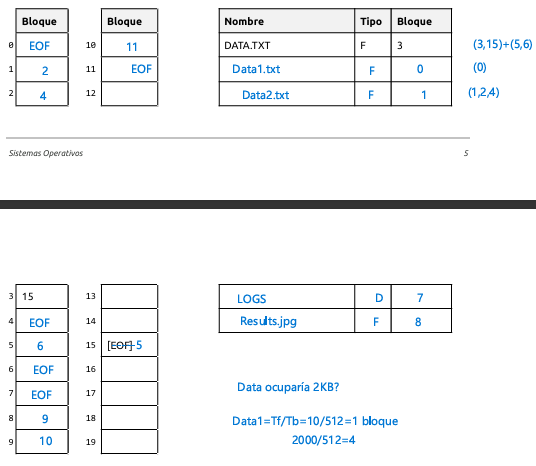

### Ejercicio 12

### Ejercicio 13

In [ ]:
//Terminal: Ejercicio 13 hoja 2: 
truncate --size 100M fs.ext2 // Reservar memoria para el inodo.
mkfs.ext2 fs.ext2 // para crear un sistema de ficheros que usa bloques indexados.
mkdir mnt // Creamos un directorio pater el SF.
sudo  mount -t ext2 -o loop ./fs.ext2 ./mnt/ 	// Para montar o desmontar se necesitan permisos de superusuario. Loop para
						// decirle que el SF esta dentro de otro SF.
echo 123456789 > small.txt // Creamos un archivo pequeñito.
dd if=/dev/random of=/big bs=024 count=520 // Un archivo grande. Del tamaño del bloque.
dd if=/dev/random of=/sparse bs=024 count=1 seek=51192 // Un archivo sparse.
// Para ver cosas del FS. No es el mismo stat que hemos usado hasta ahora. X es el numero de inodo que queramos ver. Y
// ponerle el FS que queremos ver.
debugfs -R "stat"<x> ../fs.ext2

### Ejercicio 14 
Cuantas entradas se pueden almacenar en un bloque de 4kb.

Estructura del directorio:

| Inodo | Longitud | Nombre |
|---|---|---|
| 32b | 8b | hasta 256 chars |

Se pueden almacenar:
1 entrada ocupa: 
- 32b = 4 bytes(Inodo)
- 8b = 1 byte (Longitud)
- 256 chars = 256 bytes
4 + 1 + 256 = 261 bytes => Entradas/bloque = 4*2^10 (4KB tamaño de bloque) / 261 bytes (entrada) = 15 entradas.

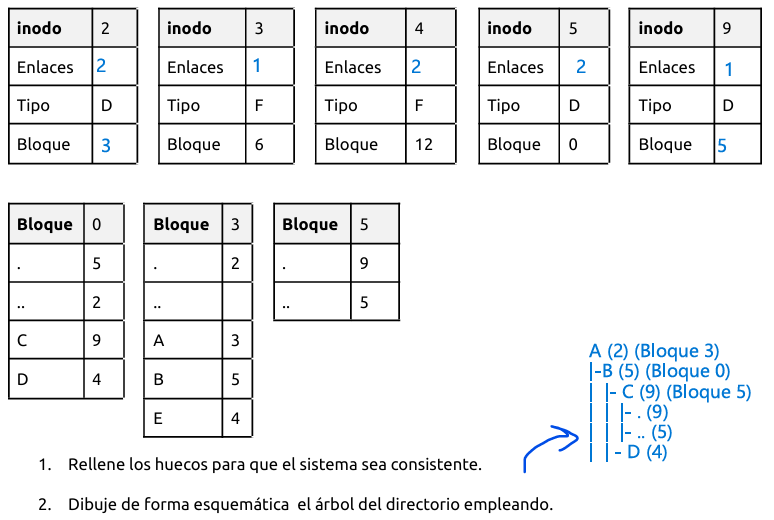

### Ejercicio 16
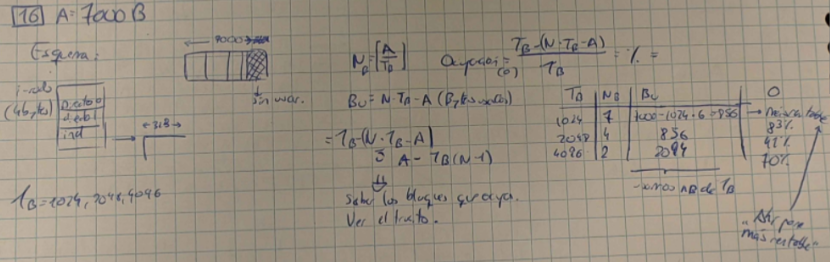

### Ejercicio 17

- Tamaño de bloque: 512bytes (2^9)
- T direcciones: 16 bits Total (2^16 bloques) (2 bytes)
- 10 punteros a bloque
- 1 puntero indirecto simple
- 1 puntero indirecto doble

>¿Cual es el tamaño maximo de un fichero en este sistema?

Total de bloques = 10 + I + I^2

I(indice/bloque) =  512 (TB) / 2 (TD) = 256 entradas (2^8)

Total = 10 + 2^8 +2^16 ~ 2^16

Tamaño = TB * Total = 2^16 * 2^9 bytes = 2^25 (32MB)

>¿Cuantos bloques del disco ocupa este nuevo fichero en disco? (No me he enterado ha ido muy rapido Paula ha preguntado pedir apuntes)
Fichero (sparse)
Bloques = 1

¿Donde esta el bloque de datos?
1000 byte TB = 1 (datos)
10k (Ind) => TB = 1+ 1(Ind) = 2